For the credit score classification dataset, we first perform EDA on the cleaned training dataset we have and get a good grasph of the features we have and its correlation with the target variable. After that, we perform the various steps involved in model training and make a model for validation with the test dataset.

**Exploratory Data Analysis**

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the cleaned dataset
df = pd.read_csv('/content/train_data_cleaned.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Score,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,2.0,False,False,True,False,False,False,False,False,False
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,2.0,False,False,False,True,False,False,False,True,False
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,2.0,False,False,False,False,True,False,False,True,False
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,2.0,False,False,False,False,False,True,False,True,False
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,2.0,False,True,False,False,False,False,False,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   ID                                                  100000 non-null  object 
 1   Customer_ID                                         100000 non-null  object 
 2   Month                                               100000 non-null  int64  
 3   Name                                                90015 non-null   object 
 4   Age                                                 100000 non-null  float64
 5   SSN                                                 100000 non-null  object 
 6   Occupation                                          100000 non-null  object 
 7   Annual_Income                                       100000 non-null  float64
 8   Monthly_Inhand_Salary                               100000 non-nu

**scatter plots for visualization**

In [11]:
#define a function to generate scatter plots and correlation between one input varibale feature and credit score of df
def scatter_plot_corr(df, feature):
  """
  Generates a scatter plot and calculates the correlation between a feature and credit score.

  Args:
    df: Pandas DataFrame containing the data.
    feature: The name of the feature to plot against credit score.
  """
  plt.figure(figsize=(8, 6))
  plt.scatter(df[feature], df['Credit_Score'])
  plt.xlabel(feature)
  plt.ylabel('Credit Score')
  plt.title(f'Scatter Plot of {feature} vs Credit Score')
  plt.show()

  correlation = df[feature].corr(df['Credit_Score'])
  print(f"Correlation between {feature} and Credit Score: {correlation}")

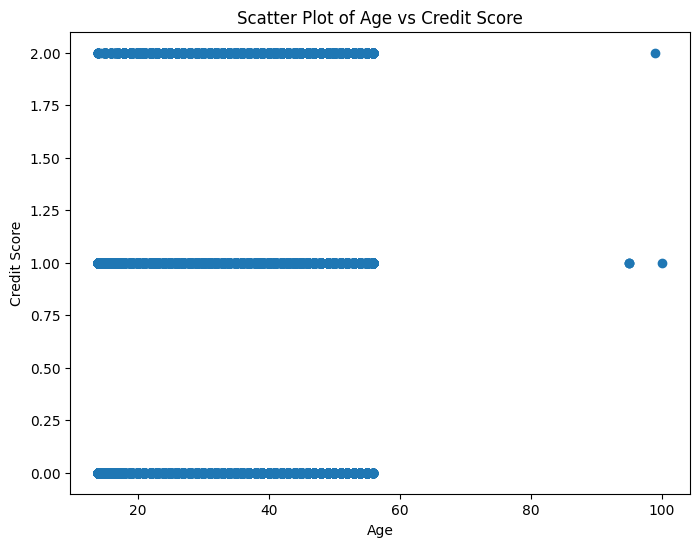

Correlation between Age and Credit Score: 0.16015138439694837


In [12]:
#scatter plot Between Age and credit score
scatter_plot_corr(df, 'Age')

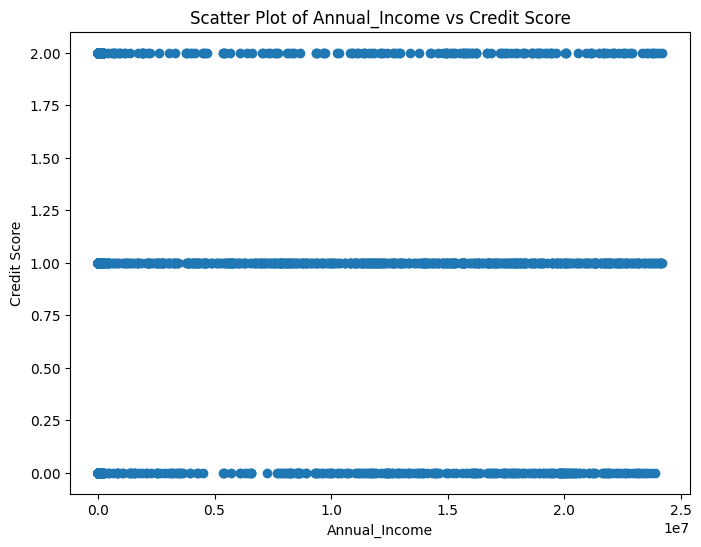

Correlation between Annual_Income and Credit Score: 0.008014579238275291


In [13]:
#scatter plot Between Annual_Income and credit score
scatter_plot_corr(df, 'Annual_Income')

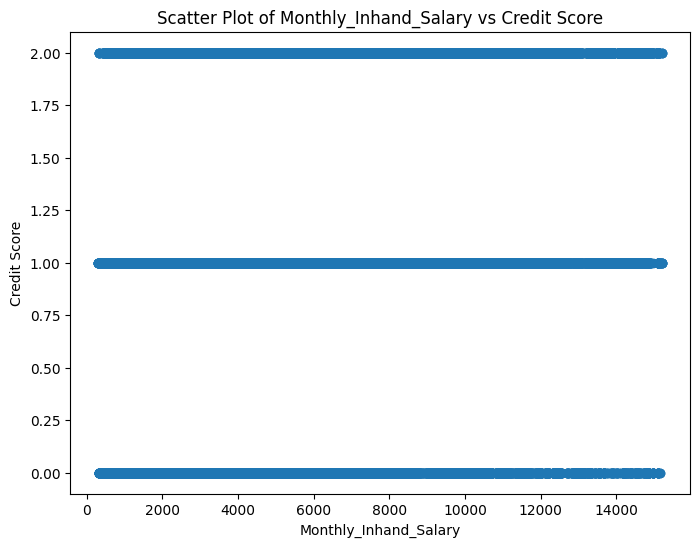

Correlation between Monthly_Inhand_Salary and Credit Score: 0.2097791307535697


In [14]:
#scatter plot Between Monthly_Inhand_Salary and credit score
scatter_plot_corr(df, 'Monthly_Inhand_Salary')

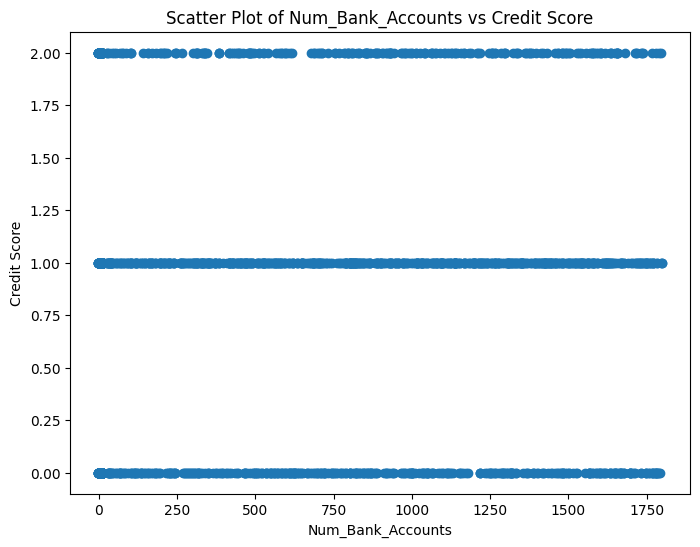

Correlation between Num_Bank_Accounts and Credit Score: -0.010490752848676796


In [15]:
#scatter plot Between Num_Bank_Accounts and credit score
scatter_plot_corr(df, 'Num_Bank_Accounts')

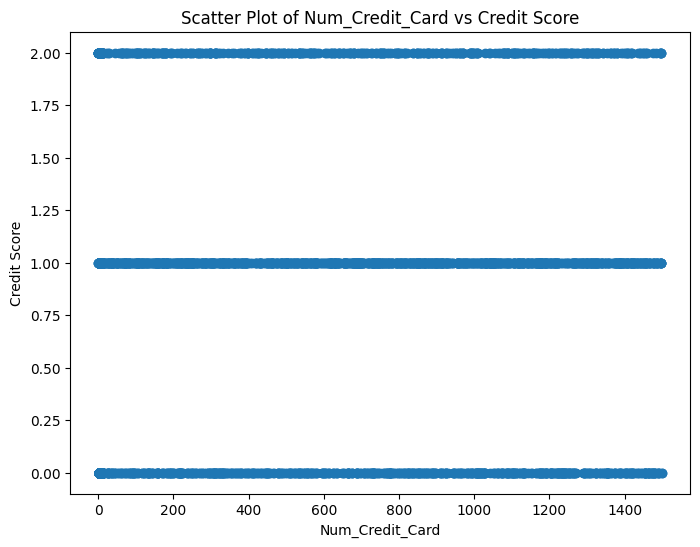

Correlation between Num_Credit_Card and Credit Score: -0.007623644428241858


In [17]:
#scatter plot Between Num_Credit_Card and credit score
scatter_plot_corr(df, 'Num_Credit_Card')

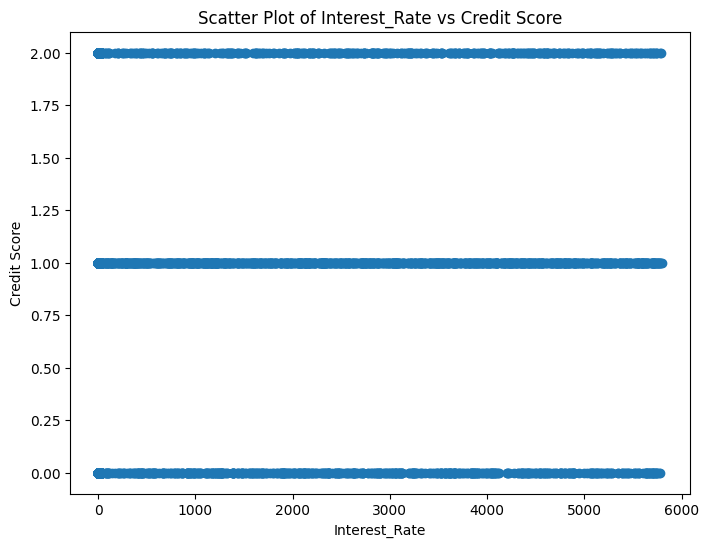

Correlation between Interest_Rate and Credit Score: -0.0025905163460360897


In [18]:
#scatter plot Between Interest_Rate and credit score
scatter_plot_corr(df, 'Interest_Rate')

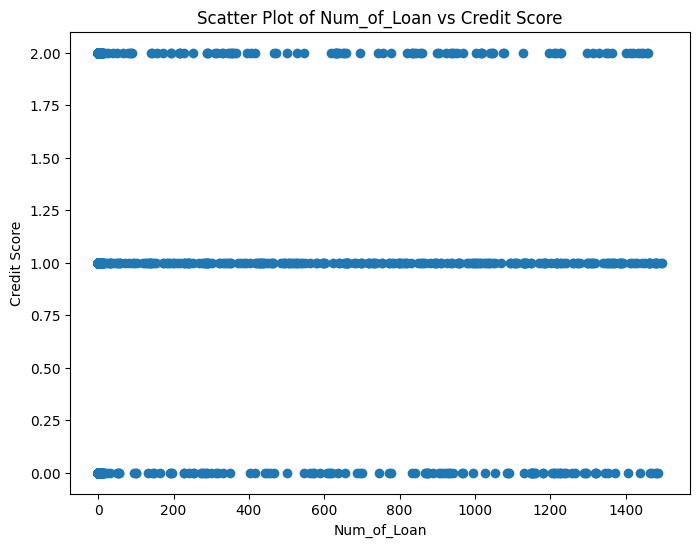

Correlation between Num_of_Loan and Credit Score: -0.009332746559692717


In [19]:
#scatter plot Between Num_of_Loan and credit score
scatter_plot_corr(df, 'Num_of_Loan')

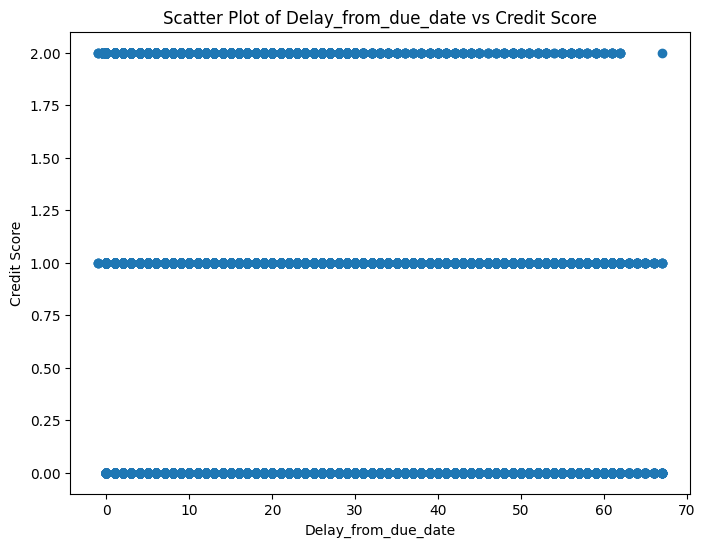

Correlation between Delay_from_due_date and Credit Score: -0.43125873972512346


In [20]:
#scatter plot Between Delay_from_due_date and credit score
scatter_plot_corr(df, 'Delay_from_due_date')

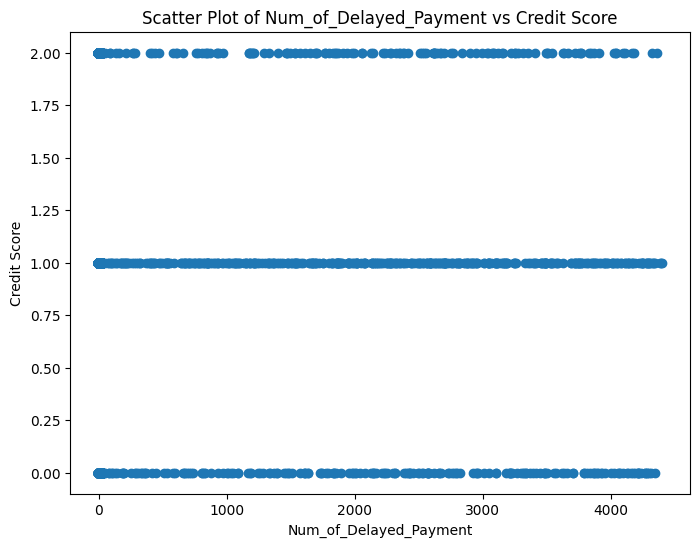

Correlation between Num_of_Delayed_Payment and Credit Score: -0.007836930906000067


In [21]:
#scatter plot Between Num_of_Delayed_Payment and credit score
scatter_plot_corr(df, 'Num_of_Delayed_Payment')

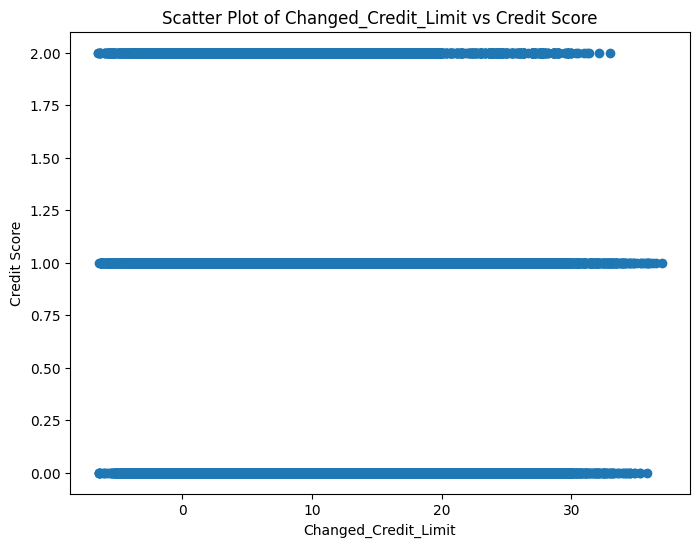

Correlation between Changed_Credit_Limit and Credit Score: -0.16289361934112598


In [22]:
#scatter plot Between Changed_Credit_Limit and credit score
scatter_plot_corr(df, 'Changed_Credit_Limit')

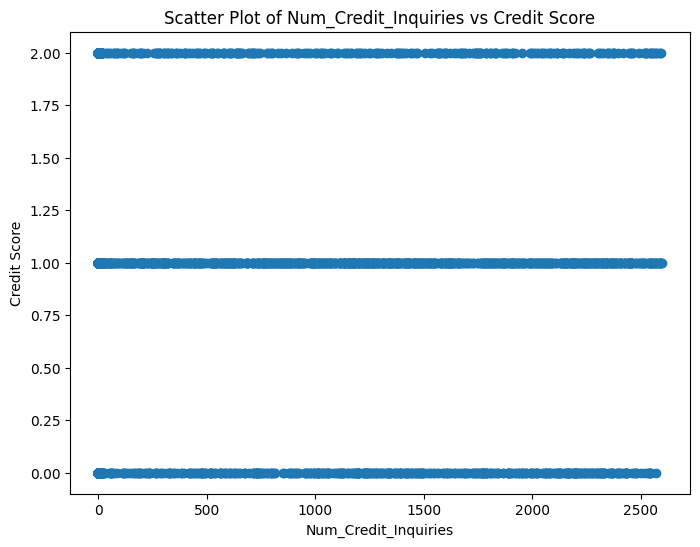

Correlation between Num_Credit_Inquiries and Credit Score: -0.011308198666673278


In [24]:
#scatter plot Between Num_Credit_Inquiries and credit score
scatter_plot_corr(df, 'Num_Credit_Inquiries')

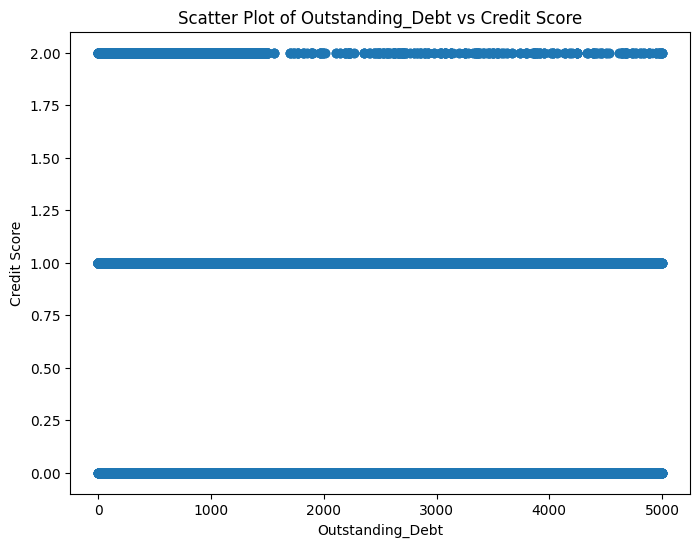

Correlation between Outstanding_Debt and Credit Score: -0.3865247385095221


In [26]:
#scatter plot Between Outstanding_Debt and credit score
scatter_plot_corr(df, 'Outstanding_Debt')

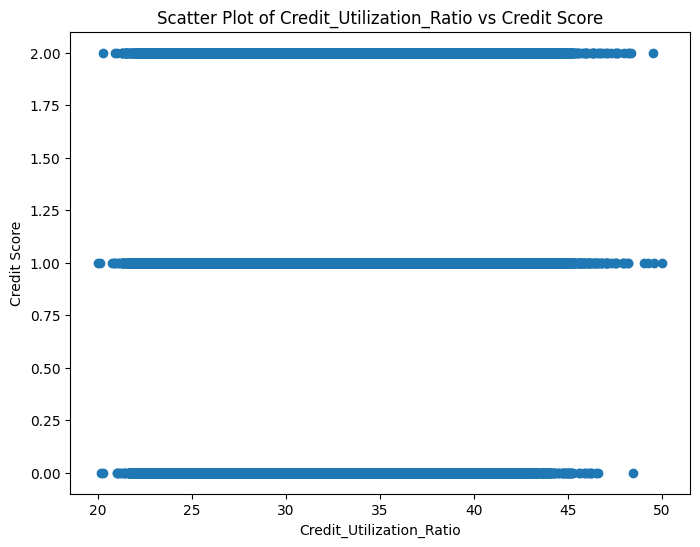

Correlation between Credit_Utilization_Ratio and Credit Score: 0.04579286731895934


In [27]:
#scatter plot Between Credit_Utilization_Ratio and credit score
scatter_plot_corr(df, 'Credit_Utilization_Ratio')

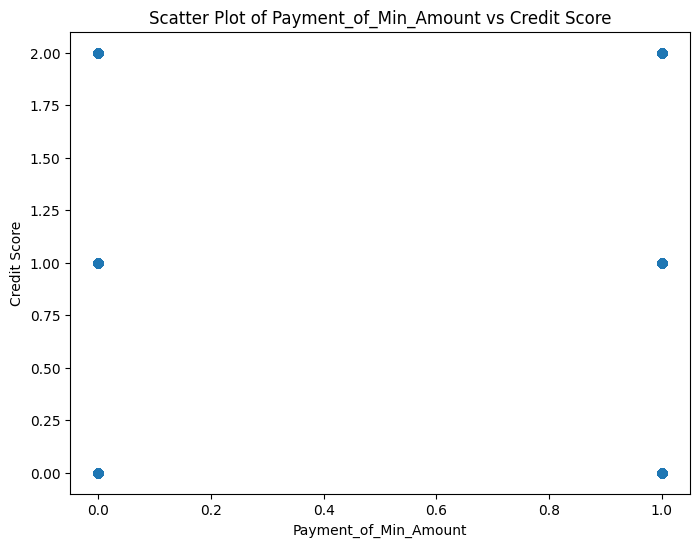

Correlation between Payment_of_Min_Amount and Credit Score: -0.3840881033590224


In [28]:
#scatter plot Between Payment_of_Min_Amount and credit score
scatter_plot_corr(df, 'Payment_of_Min_Amount')

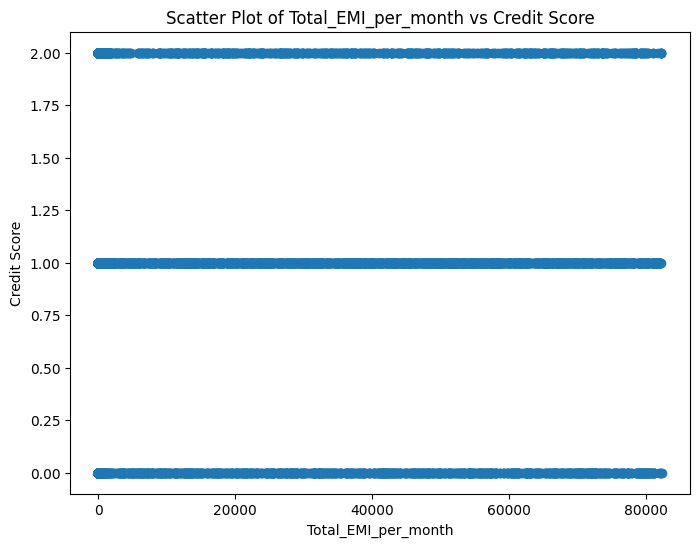

Correlation between Total_EMI_per_month and Credit Score: 0.004381720515920958


In [29]:
#scatter plot Between Total_EMI_per_month and credit score
scatter_plot_corr(df, 'Total_EMI_per_month')

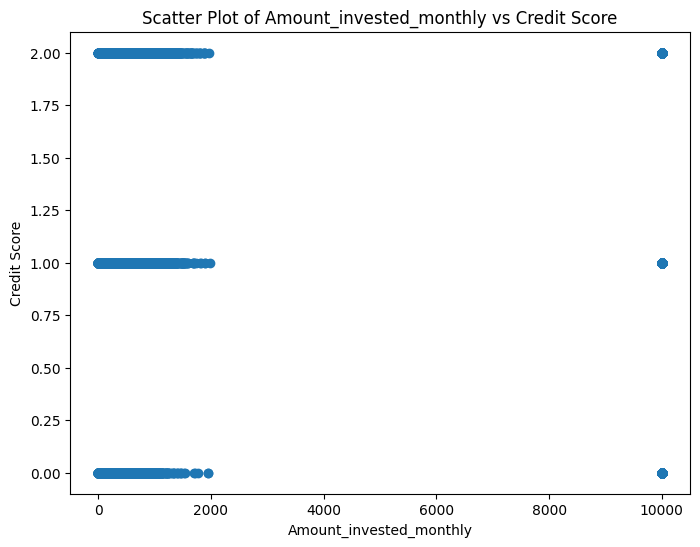

Correlation between Amount_invested_monthly and Credit Score: 0.00772186513151032


In [30]:
#scatter plot Between Amount_invested_monthly and credit score
scatter_plot_corr(df, 'Amount_invested_monthly')

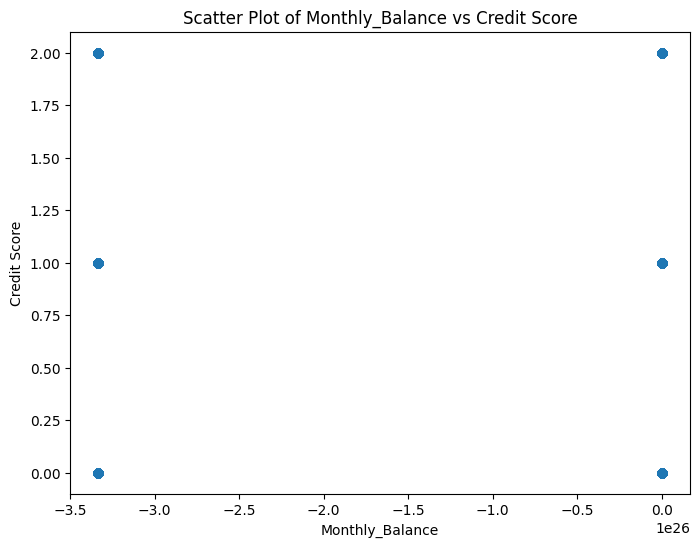

Correlation between Monthly_Balance and Credit Score: -0.010399521144574254


In [31]:
#scatter plot Between Monthly_Balance and credit score
scatter_plot_corr(df, 'Monthly_Balance')

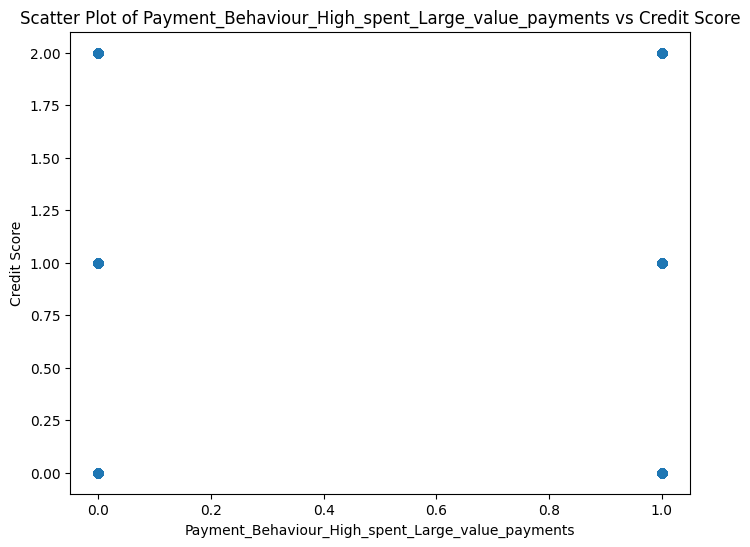

Correlation between Payment_Behaviour_High_spent_Large_value_payments and Credit Score: 0.07428900978288976


In [35]:
#scatter plot Between Payment_Behaviour_High_spent_Large_value_payments and credit score
scatter_plot_corr(df, 'Payment_Behaviour_High_spent_Large_value_payments')

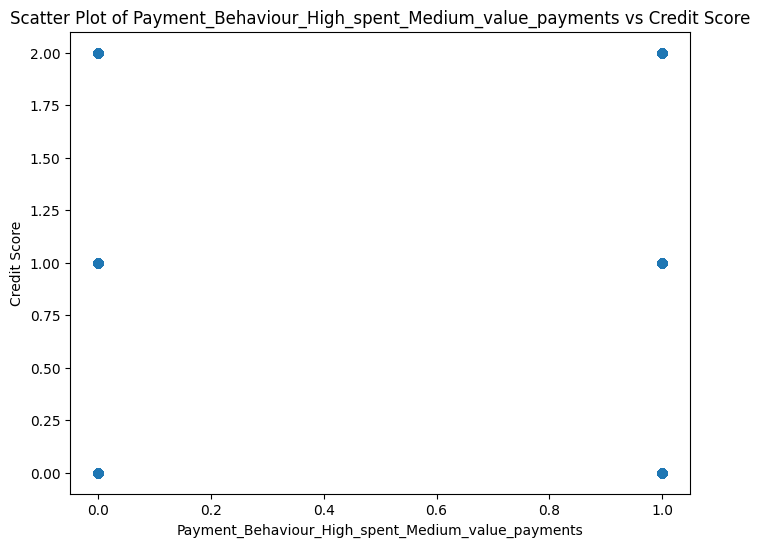

Correlation between Payment_Behaviour_High_spent_Medium_value_payments and Credit Score: 0.040670133851941695


In [37]:
#scatter plot Between Payment_Behaviour_High_spent_Medium_value_payments and credit score
scatter_plot_corr(df, 'Payment_Behaviour_High_spent_Medium_value_payments')

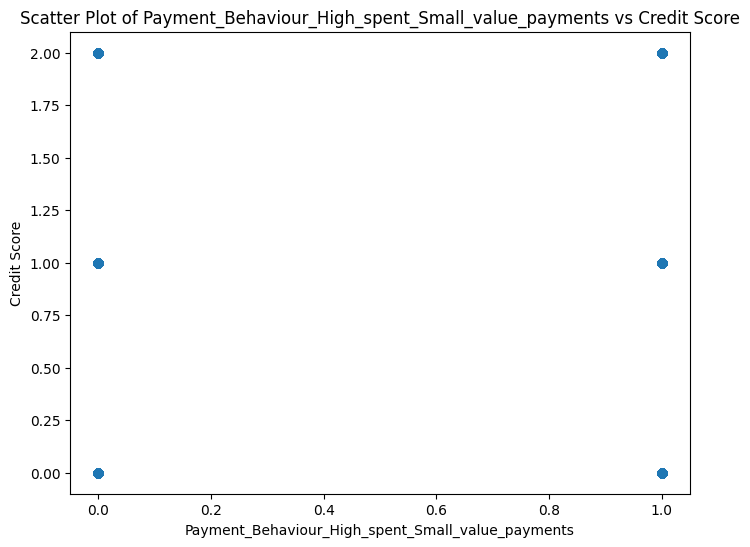

Correlation between Payment_Behaviour_High_spent_Small_value_payments and Credit Score: 0.013672268360217196


In [38]:
#scatter plot Between Payment_Behaviour_High_spent_Small_value_payments and credit score
scatter_plot_corr(df, 'Payment_Behaviour_High_spent_Small_value_payments')

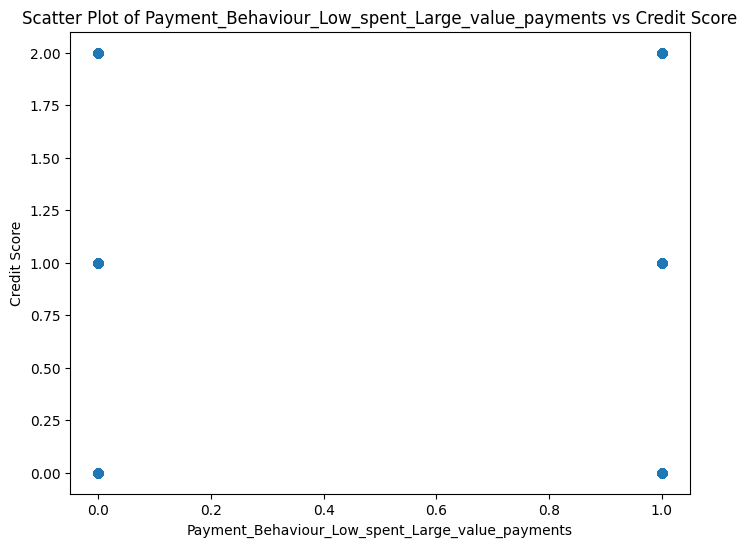

Correlation between Payment_Behaviour_Low_spent_Large_value_payments and Credit Score: 0.005500220105772978


In [39]:
#scatter plot Between Payment_Behaviour_Low_spent_Large_value_payments  and credit score
scatter_plot_corr(df, 'Payment_Behaviour_Low_spent_Large_value_payments')

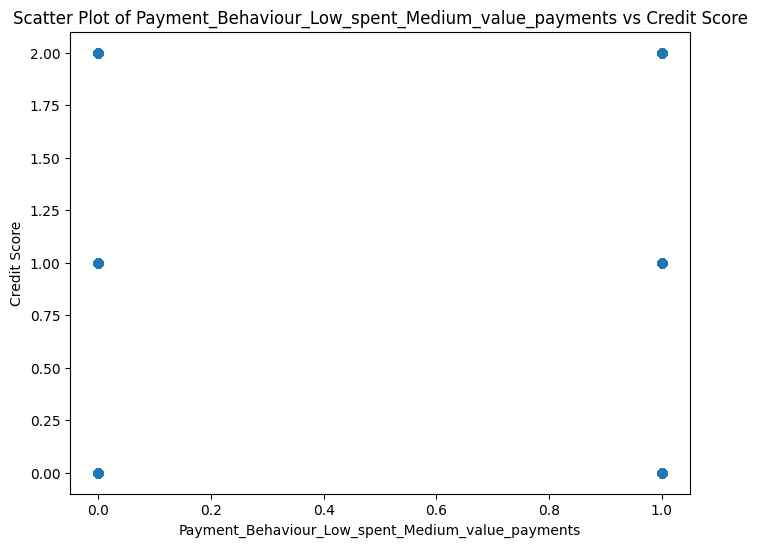

Correlation between Payment_Behaviour_Low_spent_Medium_value_payments and Credit Score: -0.007747205018245481


In [40]:
#scatter plot Between Payment_Behaviour_Low_spent_Medium_value_payments and credit score
scatter_plot_corr(df, 'Payment_Behaviour_Low_spent_Medium_value_payments')

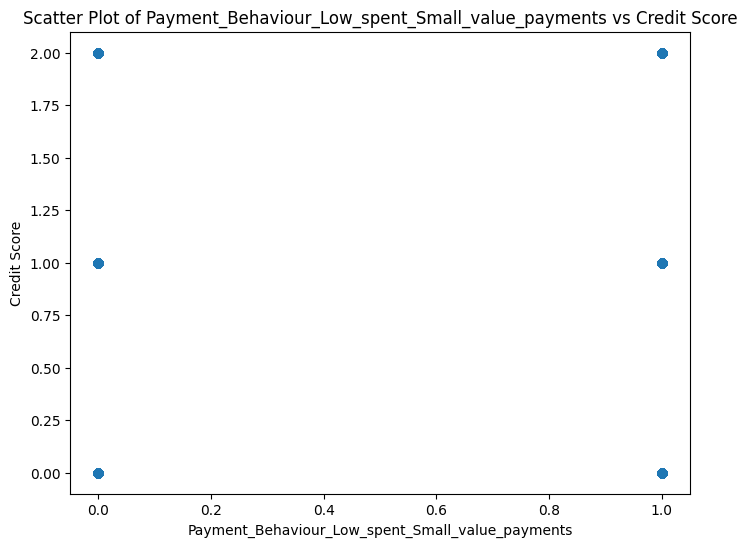

Correlation between Payment_Behaviour_Low_spent_Small_value_payments and Credit Score: -0.09427312101669064


In [41]:
#scatter plot Between Payment_Behaviour_Low_spent_Small_value_payments and credit score
scatter_plot_corr(df, 'Payment_Behaviour_Low_spent_Small_value_payments')

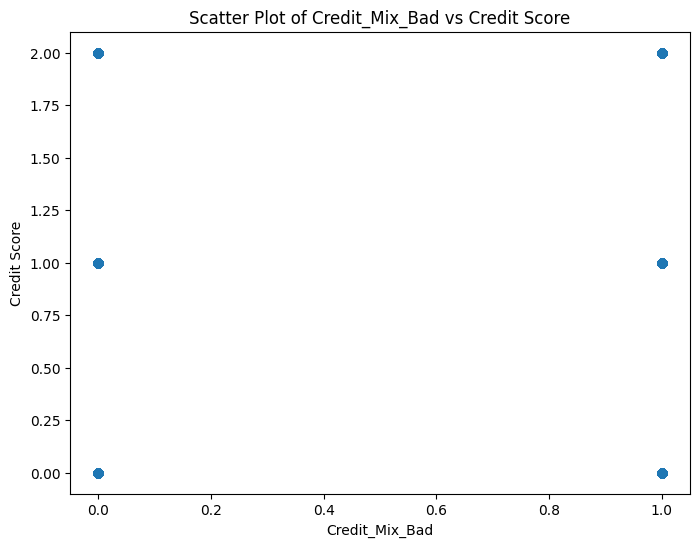

Correlation between Credit_Mix_Bad and Credit Score: -0.3398888448764978


In [42]:
#scatter plot Between Credit_Mix_Bad and credit score
scatter_plot_corr(df, 'Credit_Mix_Bad')

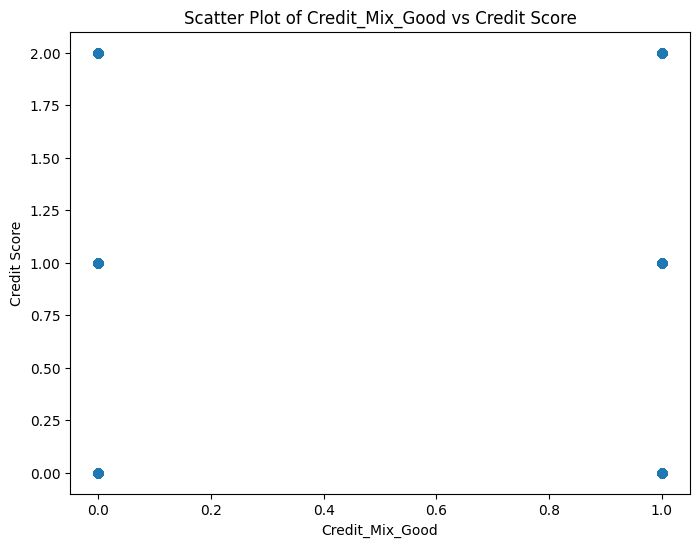

Correlation between Credit_Mix_Good and Credit Score: 0.3704624319364188


In [43]:
#scatter plot Between Credit_Mix_Good and credit score
scatter_plot_corr(df, 'Credit_Mix_Good')

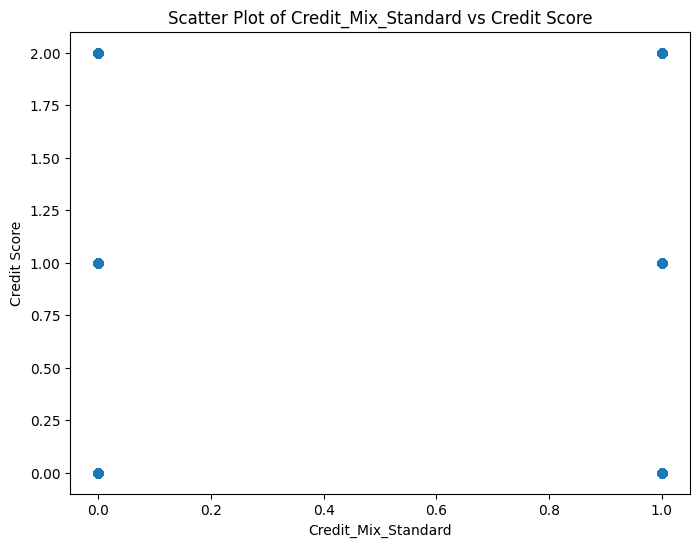

Correlation between Credit_Mix_Standard and Credit Score: -0.053581305182863165


In [44]:
#scatter plot Between Credit_Mix_Standard and credit score
scatter_plot_corr(df, 'Credit_Mix_Standard')

In [45]:
#Drop columns that are not required for model making
df_new = df.drop(['ID', 'Customer_ID','Month','Name','SSN','Occupation','Type_of_Loan'], axis=1, inplace=True)

In [49]:
#See correlation matrix
df.corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Score,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
Age,1.000000,0.006240,0.090325,-0.000326,-0.006901,-0.001180,-0.010843,-0.173740,0.001579,-0.151715,...,0.160151,0.022498,0.012516,-0.001129,0.003793,0.001465,-0.029341,-0.160810,0.182683,-0.033435
Annual_Income,0.006240,1.000000,0.030528,-0.004627,0.001250,-0.002908,0.001417,-0.010668,0.001100,0.000083,...,0.008015,0.011214,-0.002348,-0.003038,0.003564,0.002584,-0.008465,0.000528,0.009702,-0.008088
Monthly_Inhand_Salary,0.090325,0.030528,1.000000,-0.008857,-0.005039,-0.005669,-0.012723,-0.249287,0.000520,-0.170597,...,0.209779,0.240354,0.082366,-0.010791,-0.027298,0.038160,-0.245305,-0.220364,0.265200,-0.051613
Num_Bank_Accounts,-0.000326,-0.004627,-0.008857,1.000000,-0.002216,-0.003998,-0.000740,0.015978,-0.003500,0.007514,...,-0.010491,-0.002260,0.000091,-0.002677,0.004236,-0.001702,0.001882,0.007559,-0.014760,0.005929
Num_Credit_Card,-0.006901,0.001250,-0.005039,-0.002216,1.000000,-0.004012,0.000860,0.008796,0.004703,0.005915,...,-0.007624,-0.002011,-0.001396,-0.003603,-0.003342,0.001809,0.005867,0.005274,-0.007045,0.000608
Interest_Rate,-0.001180,-0.002908,-0.005669,-0.003998,-0.004012,1.000000,0.001088,0.009777,0.002667,0.000223,...,-0.002591,-0.006258,0.001636,0.004936,0.007409,0.002833,-0.006964,0.009533,-0.003109,-0.000079
Num_of_Loan,-0.010843,0.001417,-0.012723,-0.000740,0.000860,0.001088,1.000000,0.013088,0.009088,0.014568,...,-0.009333,0.002721,-0.005518,0.001932,0.000795,-0.002178,0.002251,0.018313,-0.013146,-0.002680
Delay_from_due_date,-0.173740,-0.010668,-0.249287,0.015978,0.008796,0.009777,0.013088,1.000000,0.012312,0.284118,...,-0.431259,-0.061406,-0.022774,-0.003608,0.000792,-0.007419,0.070662,0.567570,-0.420224,-0.088402
Num_of_Delayed_Payment,0.001579,0.001100,0.000520,-0.003500,0.004703,0.002667,0.009088,0.012312,1.000000,0.006994,...,-0.007837,0.007653,0.002327,-0.004798,0.001819,-0.007296,-0.000067,0.007818,-0.016104,0.006610
Changed_Credit_Limit,-0.151715,0.000083,-0.170597,0.007514,0.005915,0.000223,0.014568,0.284118,0.006994,1.000000,...,-0.162894,-0.037888,-0.013091,0.003872,0.000071,-0.008009,0.041504,0.250810,-0.340409,0.101761
